<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

# Step 9: Fit the Model

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

## STEP 1: Define the Problem
### Taken directly from the UCI Data Set Information:
To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database. These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).
<br>
### Possible questions: 
1. Using the RFMTC, can we segment the donor database into categories based on how valuable a 'customer' they are?
<br>
2. Using RFMT, can we predict which donors will donate in a given month (in this case, March 2007)

### Actual Question:
2.

## STEP 2/3: Find and Read the Data

In [1]:
# import all libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

In [2]:
# Load data into a dataframe
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'
df = pd.read_csv(data)
df.columns = ['R', 'F', 'M', 'T', 'donate']

df.head()

,R,F,M,T,donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## STEP 4: Explore and Clean the Data 

In [3]:
# First, check for null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       748 non-null    int64
 1   F       748 non-null    int64
 2   M       748 non-null    int64
 3   T       748 non-null    int64
 4   donate  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


No null values, all datatypes are integer which is consistent with requirements

In [4]:
# Drop any duplicate rows
df.drop_duplicates()

# Check length to see how df affected
df.shape


(748, 5)

In [5]:
# Describe data - domain and intervals
df.describe()

,R,F,M,T,donate
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


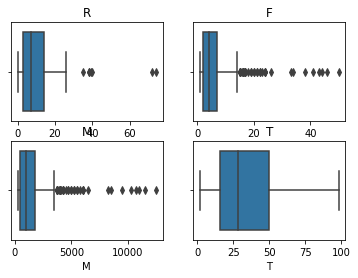

In [6]:
# Check for outliers
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[df.columns[i]])
    plt.title(df.columns[i])

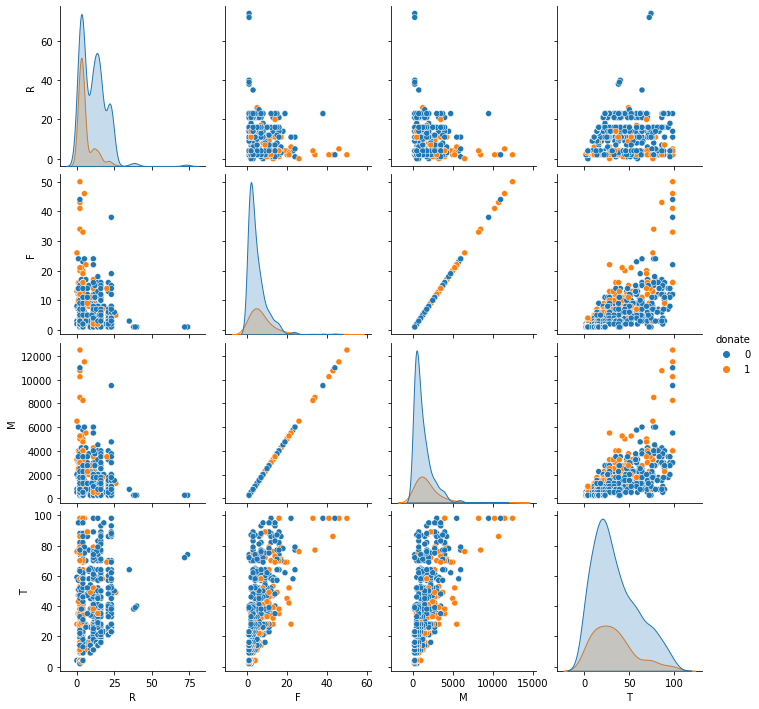

In [7]:
# Check pairplot
sns.pairplot(df, hue='donate')

## STEP 5: Prepare the Data

In [8]:
# Decision trees are relatively robust to outliers - will not remove

In [9]:
# Split into target and features
y = df.donate
X_unscaled = df.drop('donate', axis=1)

# Normalise features
X = StandardScaler().fit_transform(X_unscaled)

## STEP 6: Modelling

Will be using all features, target/label has been defined in Step 5
<br><br>
Output variable is a binary value (0 = not donated, 1 = donated)
<br><br>
Model will be supervised binary classification

## STEP 7: Splitting the Data

In [10]:
# Use train/test split, 1/5 of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## STEP 8: Define Model

In [11]:
# We will use a grid search to optimise our Decision tree model
basemodel = DecisionTreeClassifier()
params = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':np.linspace(1, 32, 32)
}
scoring = 'roc_auc'

gridmodel = GridSearchCV(basemodel, param_grid=params, scoring=scoring, cv=4)

## STEP 9: Fit the model

In [12]:
# Fit model
gridmodel_fitted = gridmodel.fit(X_train, y_train)


In [13]:
# Print best parameters
print('The chosen parameters were:\n',gridmodel_fitted.best_params_)

# Print scores on training data
print('\nBest ROC AUC:', gridmodel_fitted.best_score_)

The chosen parameters were:
 {'criterion': 'entropy', 'max_depth': 4.0, 'splitter': 'random'}

Best ROC AUC: 0.7071570229922634


## STEP 10: Evaluate training model

The accuracy score is: 0.7709030100334449
AUC: 0.7477854023705552


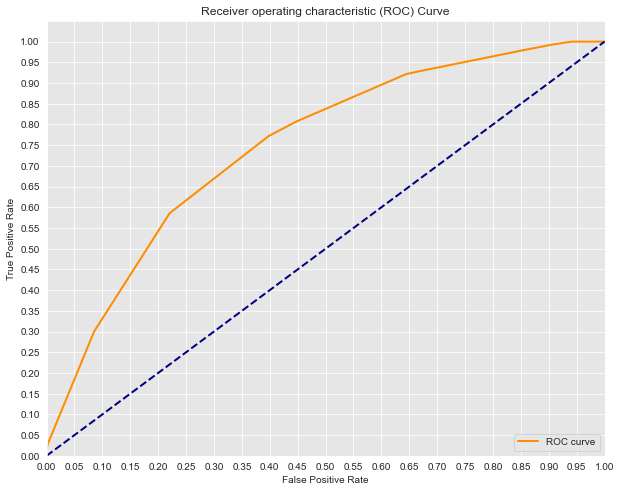

In [14]:
# Check against train data
# Generate predictions
y_predict = gridmodel_fitted.predict(X_train)
probs = gridmodel_fitted.predict_proba(X_train)
# Check accuracy score
accuracy = accuracy_score(y_train, y_predict)
print('The accuracy score is:', accuracy)

# Create ROC curve
# Find fpr and tprs
fpr, tpr, thresholds = roc_curve(y_train, probs[:,1])

# Plot
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## STEP 11: Evaluate test model

The accuracy score is: 0.76
AUC: 0.7872415413533834


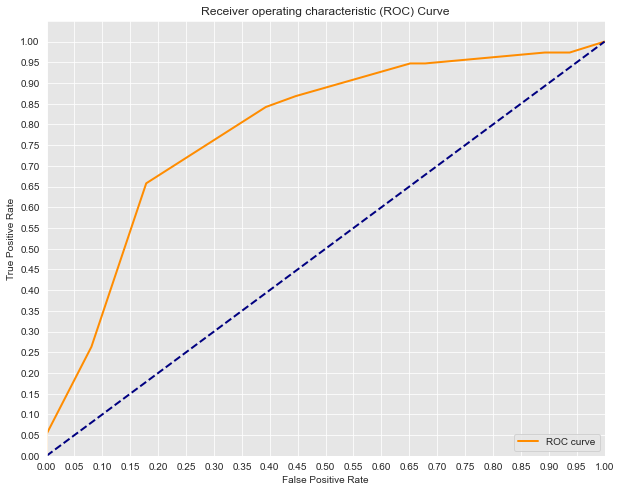

In [15]:
# Check against test data
# Generate predictions
y_predict = gridmodel_fitted.predict(X_test)
probs = gridmodel_fitted.predict_proba(X_test)
# Check accuracy score
accuracy = accuracy_score(y_test, y_predict)
print('The accuracy score is:', accuracy)

# Create ROC curve
# Find fpr and tprs
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])

# Plot
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Step 12: Solve the Problem or Answer the Question

Question: Using RFMT, can we predict which blood donors will donate in a given month? (in this case, March 2007)

Answer: We can predict it with approximately 75% accuracy, according to the given dataset. Will need further exploration to see if it can be applied to other blood donation drives in other contexts.
<br><br>
In terms of utility to the donation business, this model can identify which donors do not need targeting with additional nudges/promotions in order to get them to come in and donate. This frees up resources to focus on donors who are less likely to return frequently.



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



